opencv: https://opencv.org/

cascade

face_recognition


In [ ]:
!pip install opencv-python

In [ ]:
!pip install face_recognition

In [ ]:
from imutils import paths #has opencv functions
import cv2
import face_recognition
import os
# system related works, run time, copy folder to a path in system
import pickle
from google.colab.patches import cv2_imshow

In [ ]:
# imagePath= '/content/drive/MyDrive/07.04.2024/train'

# kEncodings = []
# kNames =[]
# for file in os.listdir(imagePath):
#   img = cv2.imread(imagePath+'/'+file)
#   print(imagePath+'/'+file)


/content/drive/MyDrive/07.04.2024/train/1475028357.0.jpg
/content/drive/MyDrive/07.04.2024/train/images (1).jpeg
/content/drive/MyDrive/07.04.2024/train/.ipynb_checkpoints


In [ ]:
# i loop, last
# error occur
# in drive, there is only images iin that folder
# actually a checkpoint is saved in the folder, its hidden, cont see in folder
#if we print and see the paths in the folder, we can see it(print(imagePath+'/'+file))
# #  eg : /content/drive/MyDrive/06.04.2024/1475028357.0.jpg
#         /content/drive/MyDrive/06.04.2024.ipynb_checkpoints
# cmd to remove it is


In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`


In [ ]:
imagePath= '/content/drive/MyDrive/07.04.2024/train'

kEncodings = []
kNames =[]
for file in os.listdir(imagePath):
  img = cv2.imread(imagePath+'/'+file)
  print(imagePath+'/'+file)
  img_enc = face_recognition.face_encodings(img)[0]
  name=file.split('.')[0]
  kEncodings.append(img_enc)
  kNames.append(name)

/content/drive/MyDrive/07.04.2024/train/1475028357.0.jpg
/content/drive/MyDrive/07.04.2024/train/images (1).jpeg


In [ ]:
kEncodings

[array([-0.13577415,  0.13553141, -0.01713504, -0.09254481, -0.15430692,
        -0.08905318,  0.01001406, -0.09324788,  0.15816541, -0.13863175,
         0.25152528,  0.03478313, -0.30415463,  0.01765473, -0.03432835,
         0.11575107, -0.17675248, -0.14273459, -0.0744209 , -0.09374382,
         0.12266281,  0.05224382,  0.01993204,  0.02323912, -0.16303197,
        -0.24310216, -0.14923853, -0.06317402,  0.01397111, -0.09994549,
         0.05643584,  0.00534441, -0.15139996, -0.06947837,  0.03481199,
         0.06083152, -0.10140721, -0.06756298,  0.20250994,  0.03082017,
        -0.1412091 , -0.04098509,  0.01926626,  0.303004  ,  0.17047107,
        -0.04689992,  0.05801756, -0.13050802,  0.03967424, -0.25905028,
         0.06716561,  0.14457636,  0.14159405,  0.13114822,  0.04403781,
        -0.10735026,  0.09360248,  0.19170186, -0.28488761,  0.05095156,
         0.13250636, -0.10909952, -0.01884824,  0.00579377,  0.19575857,
         0.091391  , -0.14095432, -0.15309149,  0.1

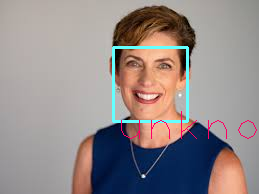

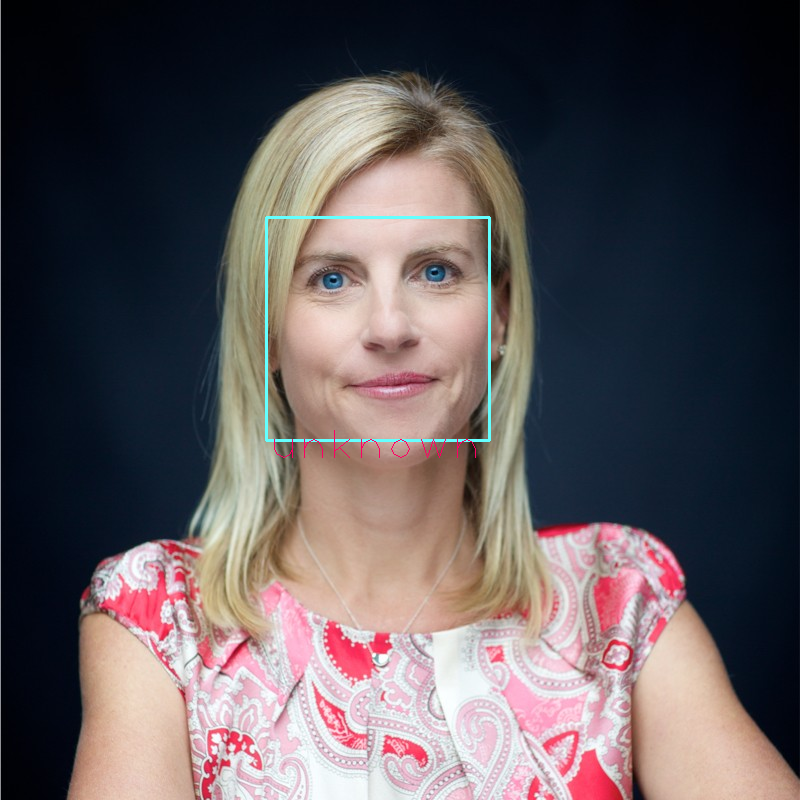

In [ ]:
#give unknown test directory
unknown_dir='/content/drive/MyDrive/07.04.2024/test'
for file in os.listdir(unknown_dir):
  img = cv2.imread(unknown_dir+'/'+file)
  img_enc = face_recognition.face_encodings(img)[0]
  results= face_recognition.compare_faces(kEncodings, img_enc)
  #matches
  res=[i for i, val in enumerate(results) if val ]
  #res=["unknown" if not val else i for i, val in enumerate(results)]
  #not matches

  if res:
    name=kNames[int(res[0])]
  else:
    name="unknown"
  (top, right, bottom, left)= face_recognition.face_locations(img)[0]
  cv2.rectangle(img,(left,top),(right, bottom), (255,255,100),2)
  #draw rectangle
  cv2.putText(img, name,(left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN,3,(100,0,255,2))
  cv2_imshow(img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

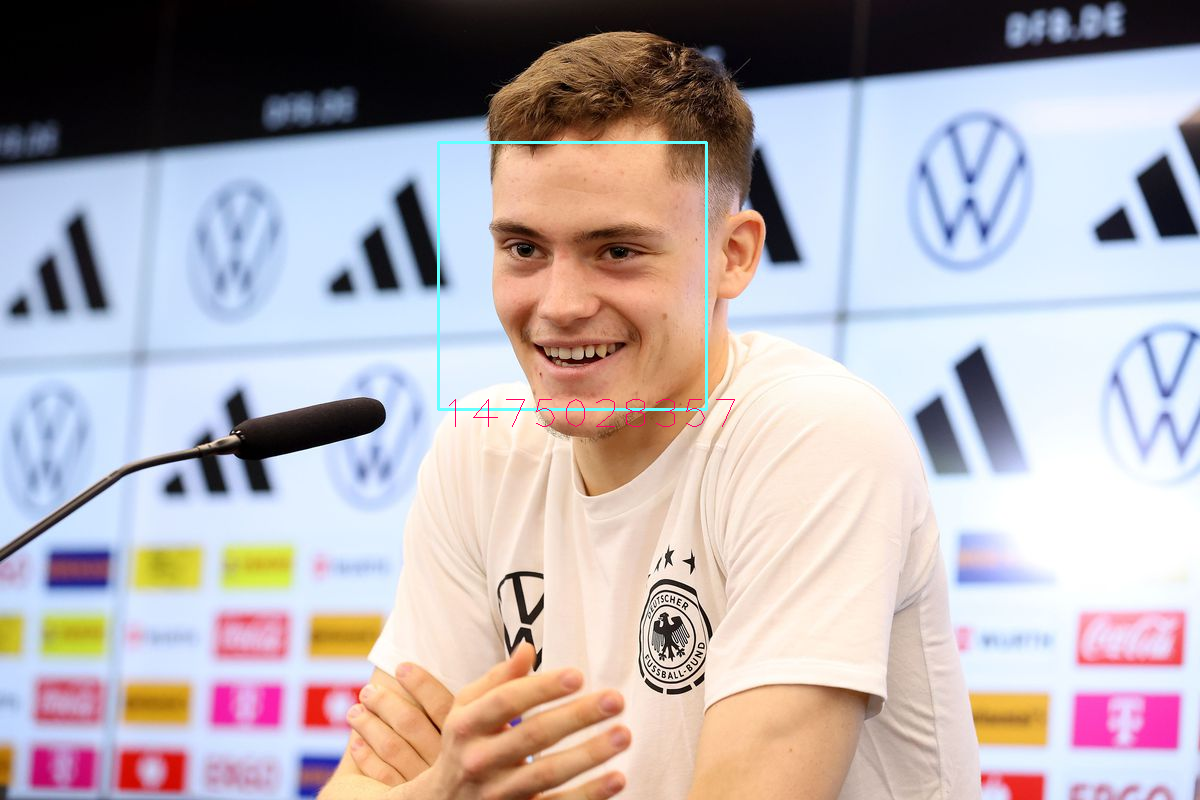

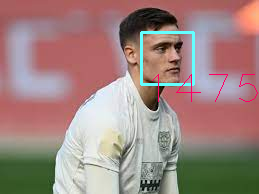

In [ ]:
#give known test directory
unknown_dir='/content/drive/MyDrive/07.04.2024/train'
for file in os.listdir(unknown_dir):
  img = cv2.imread(unknown_dir+'/'+file)
  img_enc = face_recognition.face_encodings(img)[0]
  results= face_recognition.compare_faces(kEncodings, img_enc)
  #matches
  res=[i for i, val in enumerate(results) if val ]
  #res=["unknown" if not val else i for i, val in enumerate(results)]
  #not matches

  if res:
    name=kNames[int(res[0])]
  else:
    name="unknown"
  (top, right, bottom, left)= face_recognition.face_locations(img)[0]
  cv2.rectangle(img,(left,top),(right, bottom), (255,255,100),2)
  #draw rectangle
  cv2.putText(img, name,(left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN,3,(100,0,255,2))
  cv2_imshow(img)

In [ ]:
#give known test directory
unknown_dir='/content/drive/MyDrive/07.04.2024/train'
for file in os.listdir(unknown_dir):
  img = cv2.imread(unknown_dir+'/'+file)
  img_enc = face_recognition.face_encodings(img)[0]
  results= face_recognition.compare_faces(kEncodings, img_enc)
  #matches
  print(results)
  for i, val in enumerate(results):
    print(i, val)


[True, True]
0 True
1 True
[True, True]
0 True
1 True


In [ ]:
######for live
while(1):
  id = cv2.VideoCapture(0)
  ##
  if cv2.waitKey(1)& OxFF==ord('q'):
    break


Drawback--

can train with only 1 image for one person

but has 99.38 % accuracy

In [ ]:
#reference video: https://www.youtube.com/watch?v=uwJltCOrpEI